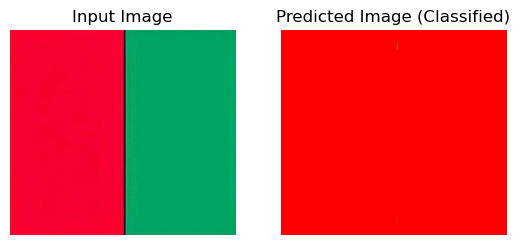

Accuracy: 100.00%


In [1]:
# Import necessary libraries
from PIL import Image  # For handling images, allowing us to open and manipulate image files
import numpy as np  # For numerical operations on arrays, which is essential for data processing
import matplotlib.pyplot as plt  # For plotting images, enabling visualization of the results
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets, crucial for model evaluation
from sklearn import svm  # For using the Support Vector Machine model, a powerful classification algorithm
from sklearn.metrics import accuracy_score  # For measuring the accuracy of the model's predictions

# Load the image from the specified path
image_path = 'image.jpeg'  # Update this with the path to your image file
image = Image.open(image_path)  # Open the image file so we can work with it

# Convert the image into a format that can be processed numerically (a NumPy array)
image_array = np.array(image)  # Convert the image to a numerical array for further processing

# Display the original input image
plt.subplot(1, 2, 1)  # Create a subplot layout with 1 row and 2 columns; we're working on the first plot
plt.imshow(image_array)  # Show the original image
plt.title("Input Image")  # Set a title for the input image for clarity
plt.axis('off')  # Hide the axis for a cleaner look, focusing on the image itself

# Reshape the image array to prepare it for classification
X = image_array.reshape(-1, 3)  # Flatten the image into a 2D array (each row represents a pixel with its RGB values)

# Define thresholds for identifying red and green colors in the image
red_threshold = np.array([200, 0, 0])  # Set a threshold for what constitutes a red pixel
green_threshold = np.array([0, 200, 0])  # Set a threshold for what constitutes a green pixel

# Initialize an array of labels (0 for red, 1 for green)
y = np.zeros(X.shape[0])  # Create an array of zeros, same length as the number of pixels in the image
y[np.all(X > red_threshold, axis=1)] = 0  # Assign label 0 to pixels that meet the red threshold
y[np.all(X > green_threshold, axis=1)] = 1  # Assign label 1 to pixels that meet the green threshold

# Split the data into training and testing sets for model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# We use 30% of the data for testing to evaluate how well the model performs on unseen data

# Initialize the Support Vector Machine (SVM) model
clf = svm.SVC(kernel='linear')  # Create an SVM classifier using a linear kernel for simplicity
clf.fit(X_train, y_train)  # Train the model on the training data, allowing it to learn the patterns

# Use the trained SVM model to predict the classes for the entire image
y_pred_full = clf.predict(X)  # Make predictions for all pixels in the image based on the trained model

# Reshape the predicted labels back into the original image dimensions
y_pred_image = y_pred_full.reshape(image_array.shape[0], image_array.shape[1])  # Convert predictions back to 2D format

# Create an output image based on the predicted labels
output_image = np.zeros_like(image_array)  # Initialize an empty image with the same shape as the original
output_image[y_pred_image == 0] = [255, 0, 0]  # Color red for class 0 (predicted red pixels)
output_image[y_pred_image == 1] = [0, 255, 0]  # Color green for class 1 (predicted green pixels)

# Display the output (classified) image
plt.subplot(1, 2, 2)  # Create the second subplot for the output image
plt.imshow(output_image)  # Show the classified output image
plt.title("Predicted Image (Classified)")  # Set a title for the classified image
plt.axis('off')  # Hide the axis for a cleaner visual presentation

# Show both images side by side for comparison
plt.show()  # Display the two images (input and predicted) for visual comparison

# Optionally, evaluate the accuracy of the model on the test set
y_pred_test = clf.predict(X_test)  # Make predictions for the test set to evaluate model performance
accuracy = accuracy_score(y_test, y_pred_test)  # Calculate how accurately the model predicted the test data
print(f"Accuracy: {accuracy * 100:.2f}%")  # Print the accuracy percentage, indicating how well the model performed


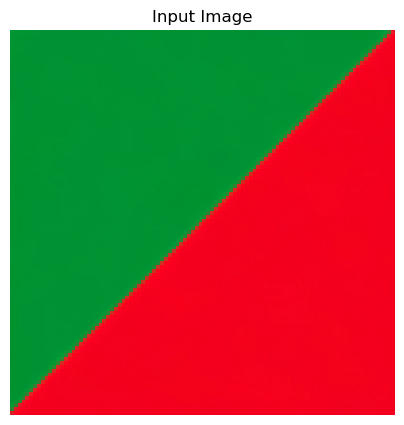

Number of green pixels: 4950


C:\Users\Hp\miniconda3\envs\machine_learning\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


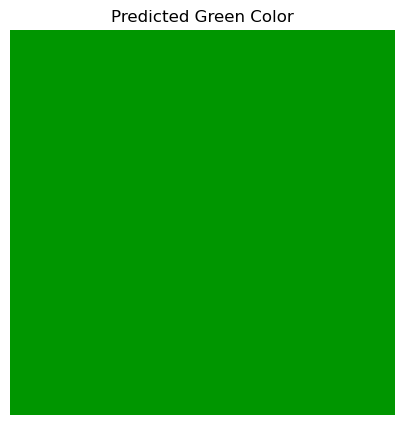

Accuracy: 100.00%


In [2]:
import numpy as np  # Library for numerical operations, especially with arrays
import matplotlib.pyplot as plt  # Library for visualizing data, particularly images
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.svm import LinearSVC  # Support Vector Machine model for classification tasks
from sklearn.metrics import accuracy_score  # For evaluating the accuracy of the model's predictions
from sklearn.preprocessing import StandardScaler  # For feature normalization
from PIL import Image  # Library for opening and manipulating image files

# Load and preprocess the image
image_path = 'diagonal_image.webp'  # Update with your image path
image = Image.open(image_path)  # Open the image file for processing
image_array = np.array(image)  # Convert the image to a NumPy array for numerical manipulation

# Resize the image for simplicity
image = image.resize((100, 100))  # Resize the image to 100x100 pixels for faster processing
image_array = np.array(image)  # Update the array after resizing

# Display the input image
plt.figure(figsize=(5, 5))  # Set the figure size for better visibility
plt.imshow(image_array)  # Show the input image in the plot
plt.title("Input Image")  # Title for the input image
plt.axis("off")  # Hide the axes for a cleaner look
plt.show()  # Render the plot

# Reshape the image for classification
X = image_array.reshape(-1, 3)  # Flatten the image into a 2D array (each row represents a pixel with RGB values)

# Define thresholds for green colors
green_min = np.array([0, 120, 0])  # Minimum for medium green
green_max = np.array([100, 255, 100])  # Maximum for green

# Initialize labels
y = np.zeros(X.shape[0])  # Start with all pixels as non-green (0)
y[np.all((X >= green_min) & (X <= green_max), axis=1)] = 1  # Set green pixels to class 1

# Print count of detected colors
print("Number of green pixels:", np.sum(y == 1))

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Normalize the pixel values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)  # 10% for testing

# Train the SVM model
clf = LinearSVC(max_iter=1000)  # Create a Support Vector Machine classifier
clf.fit(X_train, y_train)  # Train the model using the training data

# Predict the entire image using the trained SVM model
y_pred_full = clf.predict(X_scaled)  # Make predictions for all pixels
y_pred_image = y_pred_full.reshape(image_array.shape[0], image_array.shape[1])  # Convert predictions back to 2D format

# Create output image: fill entire image with medium green if any green pixels are detected
output_image = np.ones_like(image_array) * 255  # Start with a white image
if np.sum(y_pred_image == 1) > 0:  # Check if any green pixels are detected
    output_image[:] = [0, 150, 0]  # Fill the entire image with medium green

# Display the output (classified) image
plt.figure(figsize=(5, 5))  # Set the figure size for the output image
plt.imshow(output_image)  # Show the classified output image
plt.title("Predicted Green Color")  # Title for the classified image
plt.axis('off')  # Hide the axes for clarity
plt.show()  # Render the plot

# Evaluate accuracy
y_pred_test = clf.predict(X_test)  # Predict labels for the test set
accuracy = accuracy_score(y_test, y_pred_test)  # Calculate the accuracy of the predictions
print(f"Accuracy: {accuracy * 100:.2f}%")  # Print the accuracy percentage


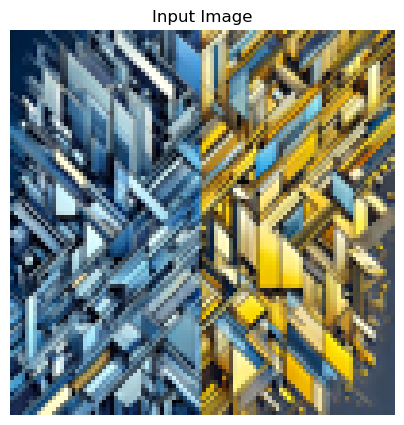

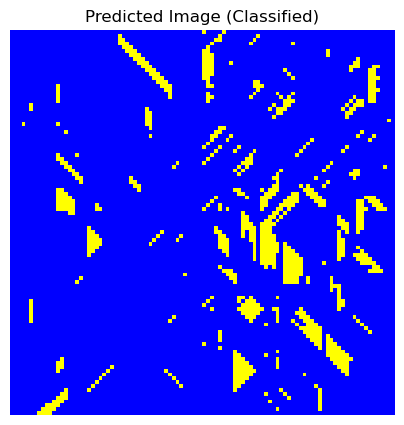

Accuracy: 99.40%


In [3]:
import numpy as np  # Library for numerical operations, especially with arrays
import matplotlib.pyplot as plt  # Library for visualizing data, particularly images
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn import svm  # Support Vector Machine model for classification tasks
from sklearn.metrics import accuracy_score  # For evaluating the accuracy of the model's predictions
from PIL import Image  # Library for opening and manipulating image files

# Load the image
img_path = "Complex.webp"  # Path to the image file; update this with your image location
img = Image.open(img_path)  # Open the image file for processing

# Resize the image for simplicity
img = img.resize((100, 100))  # Resize the image to 100x100 pixels to reduce complexity
# Resizing makes computations faster and ensures the model can process the image effectively

img_data = np.array(img)  # Convert the image to a NumPy array for numerical manipulation

# Display the input image
plt.figure(figsize=(5, 5))  # Set the figure size for better visibility
plt.imshow(img)  # Show the input image in the plot
plt.title("Input Image")  # Title for the input image
plt.axis("off")  # Hide the axes for a cleaner look
plt.show()  # Render the plot

# Reshape the image array for SVM classification
X = img_data.reshape(-1, 3)  # Flatten the image into a 2D array (each row represents a pixel with RGB values)

# Define some color thresholds for creating labels
blue_threshold = np.array([0, 0, 200])  # Threshold for identifying blue pixels
yellow_threshold = np.array([200, 200, 0])  # Threshold for identifying yellow pixels
# These thresholds help classify pixels based on their color intensity, allowing the model to learn what constitutes blue and yellow.

# Initialize labels: class 0 for blue, class 1 for yellow
y = np.zeros(X.shape[0])  # Create an array of zeros to hold labels for each pixel
y[np.all(X > blue_threshold, axis=1)] = 0  # Assign label 0 to pixels that meet the blue threshold
y[np.all(X > yellow_threshold, axis=1)] = 1  # Assign label 1 to pixels that meet the yellow threshold

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# 30% of the data is reserved for testing, allowing us to evaluate the model's performance on unseen data.

# Initialize and train the SVM model
clf = svm.SVC(kernel='rbf')  # Create a Support Vector Machine classifier with a radial basis function kernel
clf.fit(X_train, y_train)  # Train the model using the training data

# Predict the entire image using the trained SVM model
y_pred_full = clf.predict(X)  # Make predictions for all pixels based on the trained model

# Reshape the predicted labels back into the image dimensions
y_pred_image = y_pred_full.reshape(img_data.shape[0], img_data.shape[1])  # Convert predictions back to 2D format

# Create an output image based on predicted labels
output_image = np.zeros_like(img_data)  # Initialize an empty image with the same shape as the original
output_image[y_pred_image == 0] = [0, 0, 255]  # Set detected blue pixels to blue (class 0)
output_image[y_pred_image == 1] = [255, 255, 0]  # Set detected yellow pixels to yellow (class 1)

# Display the output (classified) image
plt.figure(figsize=(5, 5))  # Set the figure size for the output image
plt.imshow(output_image)  # Show the classified output image
plt.title("Predicted Image (Classified)")  # Title for the classified image
plt.axis('off')  # Hide the axes for clarity
plt.show()  # Render the plot

# Optionally, display the accuracy if needed
y_pred_test = clf.predict(X_test)  # Predict labels for the test set to evaluate model performance
accuracy = accuracy_score(y_test, y_pred_test)  # Calculate the accuracy of the predictions
print(f"Accuracy: {accuracy * 100:.2f}%")  # Print the accuracy percentage


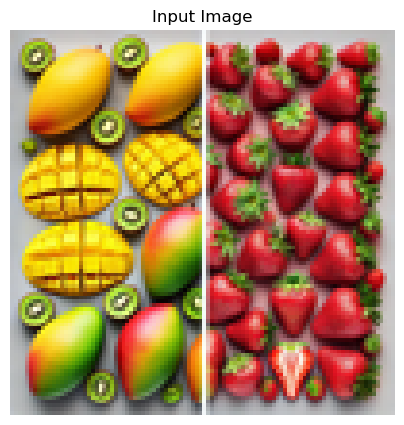

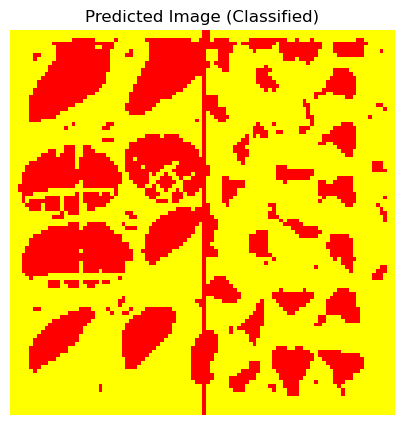

Accuracy: 98.10%


In [4]:
import numpy as np  # Import NumPy for numerical operations on arrays
import matplotlib.pyplot as plt  # Import Matplotlib for plotting images
from sklearn import svm  # Import Support Vector Machine from scikit-learn for classification tasks
from sklearn.metrics import accuracy_score  # Import accuracy score function to evaluate model performance
from PIL import Image  # Import Python Imaging Library (PIL) for handling image files

# Load the image
img_path = "Fruits_image.webp"  # Path to the image file containing fruits; update this as needed
img = Image.open(img_path)  # Open the image file for processing

# Resize the image for simplicity
img = img.resize((100, 100))  # Resize the image to 100x100 pixels to reduce complexity and speed up processing
# Resizing is helpful for smaller datasets and faster computations, making it easier for the model to learn.

img_data = np.array(img)  # Convert the image into a NumPy array for numerical operations

# Display the input image
plt.figure(figsize=(5, 5))  # Set the figure size for better visibility
plt.imshow(img)  # Show the input image in the plot
plt.title("Input Image")  # Title for the input image
plt.axis("off")  # Hide the axes for a cleaner visual representation
plt.show()  # Render the plot to display the image

# Reshape the image array for SVM classification
X = img_data.reshape(-1, 3)  # Flatten the image into a 2D array where each row represents a pixel's RGB values

# Define some color thresholds for creating labels
mango_threshold = np.array([200, 180, 0])  # Threshold for identifying mango pixels (yellowish color)
strawberry_threshold = np.array([200, 0, 0])  # Threshold for identifying strawberry pixels (reddish color)
# These thresholds are chosen based on the expected RGB color values of mangoes and strawberries to help classify them accurately.

# Initialize labels: class 0 for mangoes, class 1 for strawberries
y = np.zeros(X.shape[0])  # Create an array of zeros to hold labels for each pixel
y[np.all(X > mango_threshold, axis=1)] = 0  # Assign label 0 to pixels that meet the mango threshold
y[np.all(X > strawberry_threshold, axis=1)] = 1  # Assign label 1 to pixels that meet the strawberry threshold

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split  # Import the train_test_split function for splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# 30% of the data is reserved for testing, allowing us to evaluate the model's performance on unseen data.

# Initialize and train the SVM model
clf = svm.SVC(kernel='linear')  # Create a Support Vector Machine classifier with a linear kernel
clf.fit(X_train, y_train)  # Train the model using the training data

# Predict the entire image using the trained SVM model
y_pred_full = clf.predict(X)  # Make predictions for all pixels based on the trained model

# Reshape the predicted labels back into the image dimensions
y_pred_image = y_pred_full.reshape(img_data.shape[0], img_data.shape[1])  # Convert predictions back to 2D format

# Create an output image based on predicted labels
output_image = np.zeros_like(img_data)  # Initialize an empty image with the same shape as the original
output_image[y_pred_image == 0] = [255, 255, 0]  # Set detected mango pixels to yellow (class 0)
output_image[y_pred_image == 1] = [255, 0, 0]  # Set detected strawberry pixels to red (class 1)

# Display the output (classified) image
plt.figure(figsize=(5, 5))  # Set the figure size for the output image
plt.imshow(output_image)  # Show the classified output image
plt.title("Predicted Image (Classified)")  # Title for the classified image
plt.axis("off")  # Hide the axes for clarity
plt.show()  # Render the plot to display the classified image

# Optionally, display the accuracy if needed
y_pred_test = clf.predict(X_test)  # Predict labels for the test set to evaluate model performance
accuracy = accuracy_score(y_test, y_pred_test)  # Calculate the accuracy of the predictions
print(f"Accuracy: {accuracy * 100:.2f}%")  # Print the accuracy percentage
